<a href="https://colab.research.google.com/github/lagrom/OptimizacionConvexa/blob/main/HW07_SVM_Scikit_Learn_Convex_Optimization_Angel_Alex_Luis_JuanP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img style="vertical-align:middle" align="left" width="170" src=https://www.iteso.mx/lfportal-publico-theme/images/img/logos/Logo-ITESO-MinimoV.png>

**<h1 align="center">HW 07: SVM Scikit-Learn**
<h2 align="center">Convex Optimization 

Master in data Science</h2> 

<h5 align="center"> Prof. Dr. Juan Diego Sánchez Torres</h2> 



> <ins>Team:</ins>  
Ángel Tomás Wong Dan  
Alex Medina Anguiano  
Luis Alfonso Guerrero Montaño  
Juan Pablo Acevedo Robles



---




#**Problem 1: Basic Exercises of SVM in Scikit-Learn**
Read and reproduce the following examples carefully, then
complete the mathematical deductions and code descriptions.
Upload your results to [Github](https://github.com) in the form of a [Jupyter](https://jupyter.org) notebook,
then make it interactive using [Binder](https://mybinder.org), hence submit
your results through both links. The use of [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb) is
highly recommended.

# 1. First, the Support Vector Machines basics for Scikit Learn and all the examples therein.

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

## 1.1. Classification¶

VC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section Mathematical formulation). On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. Note that LinearSVC does not accept parameter kernel, as this is assumed to be linear. It also lacks some of the attributes of SVC and NuSVC, like support_.

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of class labels (strings or integers), of shape (n_samples):

In [ ]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

After being fitted, the model can then be used to predict new values:

In [ ]:
clf.predict([[2., 2.]])

array([1])

SVMs decision function (detailed in the Mathematical formulation) depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes support_vectors_, support_ and n_support_:

In [ ]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [ ]:
# get indices of support vectors
clf.support_


array([0, 1], dtype=int32)

In [ ]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

### **Example:** SVM: Maximum margin separating hyperplane

Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with linear kernel.
See the mathematical definition [here](#svc_math).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)



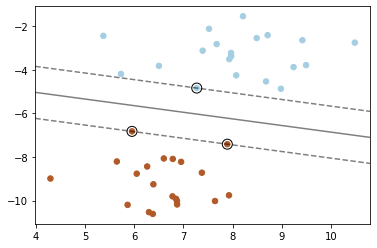

In [ ]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

<a name="NonLinearSVM_ex">

### **Example**: Non-linear SVM

</a>

Perform binary classification using non-linear SVC with RBF kernel. See the mathematical definition here.
The target to predict is a [XOR](https://en.wikipedia.org/wiki/Exclusive_or) of the inputs.

As in the past example the solution is based in the [SVC](#svc_math) solution:
$$
\sum_{i \in S V} y_{i} \alpha_{i} K\left(x_{i}, x\right)+b
$$

The difference in this case is that we will use the "[Kernel trick](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f)" so we can implement a non linear classification using the same formula, the used kernel is the Radial Basis Function kernel or [RBF](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) (a.k.a. Gaussian Kernel):


$$
K\left(x, x^{\prime}\right)=e^{-\gamma|| x-x^{\prime}||^{2}}
$$

where gamma can be set manually and has to be $>0$. The default value for gamma in sklearn's SVM classification algorithm is:
$$
\gamma=\frac{1}{n \text { features } * \sigma^{2}}
$$


Briefly:
|| $\mathbf{x}-\mathbf{x}^{\prime}||^{2}$ is the squared Euclidean distance between two feature vectors ( 2 points).
Gamma is a scalar that defines how much influence a single training example (point) has.

The resulting graph will separate the negative valus from the positives. Negatives values are in the upper left and lower right quadrants.

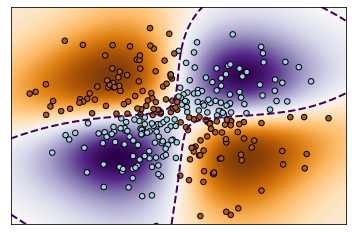

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

### **Example:** SVM-Anova: SVM with univariate feature selection

This example shows how to perform univariate feature selection before running a [SVC](#svc_math) (support vector classifier) to improve the classification scores. We use the iris dataset (4 features) and add 36 non-informative features. We can find that our model achieves best performance when we select around 10% of features.

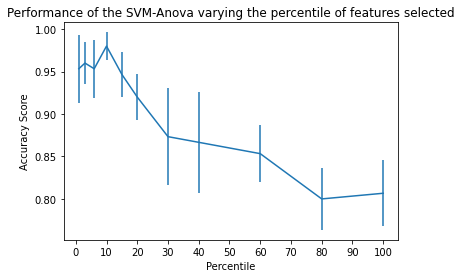

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# #############################################################################
# Import some data to play with
X, y = load_iris(return_X_y=True)
# Add non-informative features
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator
clf = Pipeline(
    [
        ("anova", SelectPercentile(chi2)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

### 1.1.1. Multi-class classification

[SVC](#svc_math) and [NuSVC](#nusvc_math) implement the “[one-versus-one](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)” approach for multi-class classification. In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes. To provide a consistent interface with other classifiers, the decision_function_shape option allows to monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape (n_samples, n_classes).

In [ ]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)
SVC(decision_function_shape='ovo')
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

On the other hand, [LinearSVC](#linearsvc_math) implements “[one-vs-the-rest](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/)” multi-class strategy, thus training n_classes models.

In [ ]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

Note that the Linearsvc also implements an alternative multi-class strategy, the so-called multi-class [SVM formulated by Crammer and Singer](#linearsvr_math), by using the option multi_c lass $=^{\prime}$ crammer_singer'. In practice, one-vs-rest classification is usually preferred, since the results are mostly similar, but the runtime is significantly less.
For "one-vs-rest" Linearsvc the attributes coef_and intercept_have the shape (n_classes, n_features) and (n_classes,) respectively. Each row of the coefficients corresponds to one of the $n_{-} c$ lasses "one-vs-rest" classifiers and similar for the intercepts, in the order of the "one" class.
In the case of "one-vs-one" svc and NuSVC, the layout of the attributes is a little more involved. In the case of a linear kernel, the attributes coef_and intercept_have the shape (n_classes * (n_classes - 1) / 2, n_features) and (n_classes * (n_classes - 1) / 2) respectively. This is similar to the layout for Linearsvc described above, with each row now corresponding to a binary classifier. The order for classes 0 to $n$ is "0 vs 1 ", "0 vs 2 ", $\ldots$ " 0 vs $n$ ", "1 vs 2 ", "1 vs 3 ", "1 vs $n$ ", ... "n-1 vs $\mathrm{n}$ ".
The shape of dual_coef_is (n_classes-1, n_SV) with a somewhat hard to grasp layout. The columns correspond to the support vectors involved in any of the $n_{-c l a s s e s} *$ (n_classes $-1$ ) / 2 "one-vs-one" classifiers. Each of the support vectors is used in $n_{-}$classes $-1$ classifiers. The $n_{\text {classes }}-1$ entries in each row correspond to the dual coefficients for these classifiers.
This might be clearer with an example: consider a three class problem with class 0 having three support vectors $v_{0}^{0}, v_{0}^{1}, v_{0}^{2}$ and class 1 and 2 having two support vectors $v_{1}^{0}, v_{1}^{1}$ and $v_{2}^{0}, v_{2}^{1}$ respectively. For each support vector $v_{i}^{j}$, there are two dual coefficients. Let's call the coefficient of support vector $v_{i}^{j}$ in the classifier between classes $i$ and $k \alpha_{i, k}^{j} .$ Then dual_coef_looks like this:

$$
\begin{array}{ccl}
\hline \alpha_{0,1}^{0} & \alpha_{0,2}^{0} & \text { Coefficients } \\
\hline \alpha_{0,1}^{1} & \alpha_{0,2}^{1} & \text { for SVs of class } 0 \\
\hline \alpha_{0,1}^{2} & \alpha_{0,2}^{2} & \\
\hline \alpha_{1,0}^{0} & \alpha_{1,2}^{0} & \text { Coefficients } \\
\hline \alpha_{1,0}^{1} & \alpha_{1,2}^{1} & \text { for SVs of class } 1 \\
\hline \alpha_{2,0}^{0} & \alpha_{2,1}^{0} & \text { Coefficients } \\
\hline \alpha_{2,0}^{1} & \alpha_{2,1}^{1} & \text { for SVs of class } 2
\end{array}
$$

<a name="SVMClassIris_ex">

#### **Example:** Plot different SVM classifiers in the iris dataset


</a>

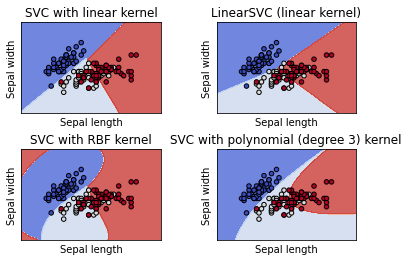

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### 1.1.2. Scores and probabilities

The decision_function method of SVC and NuSVC gives per-class scores for each sample (or a single score per sample in the binary case). When the constructor option probability is set to True, class membership probability estimates (from the methods predict_proba and predict_log_proba) are enabled. In the binary case, the probabilities are calibrated using [Platt scaling](https://en.wikipedia.org/wiki/Platt_scaling): logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data. In the multiclass case.

The cross-validation involved in Platt scaling is an expensive operation for large datasets. In addition, the probability estimates may be inconsistent with the scores:

* The “argmax” of the scores may not be the argmax of the probabilities
in binary classification, a sample may be labeled by predict as belonging to the positive class even if the output of predict_proba is less than 0.5; and similarly, it could be labeled as negative even if the output of predict_proba is more than 0.5.
* [Platt’s method](https://en.wikipedia.org/wiki/Platt_scaling) is also known to have theoretical issues. If confidence scores are required, but these do not have to be probabilities, then it is advisable to set probability=False and use decision_function instead of predict_proba.

Please note that when decision_function_shape='ovr' and n_classes > 2, unlike decision_function, the predict method does not try to break ties by default. You can set break_ties=True for the output of predict to be the same as np.argmax(clf.decision_function(...), axis=1), otherwise the first class among the tied classes will always be returned; but have in mind that it comes with a computational cost. See SVM Tie Breaking Example for an example on tie breaking.

<a name="SVMTieBreaking_ex">

#### **Example:** SVM Tie Breaking

</a>

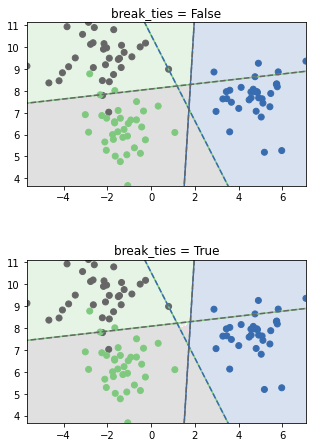

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=27)

fig, sub = plt.subplots(2, 1, figsize=(5, 8))
titles = ("break_ties = False", "break_ties = True")

for break_ties, title, ax in zip((False, True), titles, sub.flatten()):

    svm = SVC(
        kernel="linear", C=1, break_ties=break_ties, decision_function_shape="ovr"
    ).fit(X, y)

    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]

    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = np.linspace(ylim[0], ylim[1], 1000)
    xx, yy = np.meshgrid(xs, ys)

    pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    colors = [plt.cm.Accent(i) for i in [0, 4, 7]]

    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
    classes = [(0, 1), (0, 2), (1, 2)]
    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    ax.imshow(
        -pred.reshape(xx.shape),
        cmap="Accent",
        alpha=0.2,
        extent=(xlim[0], xlim[1], ylim[1], ylim[0]),
    )

    for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
        line2 = -(line * coef[1] + intercept) / coef[0]
        ax.plot(line2, line, "-", c=colors[col[0]])
        ax.plot(line2, line, "--", c=colors[col[1]])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_aspect("equal")

plt.show()

### 1.1.3. Unbalanced problems

In problems where it is desired to give more importance to certain classes or certain individual samples, the parameters class_weight and sample_weight can be used.

SVC (but not NuSVC) implements the parameter class_weight in the fit method. It’s a dictionary of the form {class_label : value}, where value is a floating point number > 0 that sets the parameter C of class class_label to C * value. The figure below illustrates the decision boundary of an unbalanced problem, with and without weight correction.

SVC, NuSVC, SVR, NuSVR, LinearSVC, LinearSVR and OneClassSVM implement also weights for individual samples in the fit method through the sample_weight parameter. Similar to class_weight, this sets the parameter C for the i-th example to C * sample_weight[i], which will encourage the classifier to get these samples right. As we can see in the following examples:

<a name="SVMUnbalanced_ex">

#### **Example:** SVM: Separating hyperplane for unbalanced classes

</a>

Find the optimal separating hyperplane using an SVC for classes that are unbalanced.

We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes.

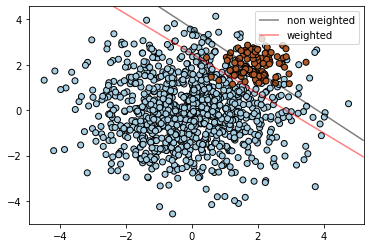

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=["-"])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["-"])

plt.legend(
    [a.collections[0], b.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

<a name="SVMWeighted_ex">

#### **Example:** SVM: Weighted samples

</a>

Plot decision function of a weighted dataset, where the size of points is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier puts more emphasis on getting these points right. The effect might often be subtle. To emphasize the effect here, we particularly weight outliers, making the deformation of the decision boundary very visible.

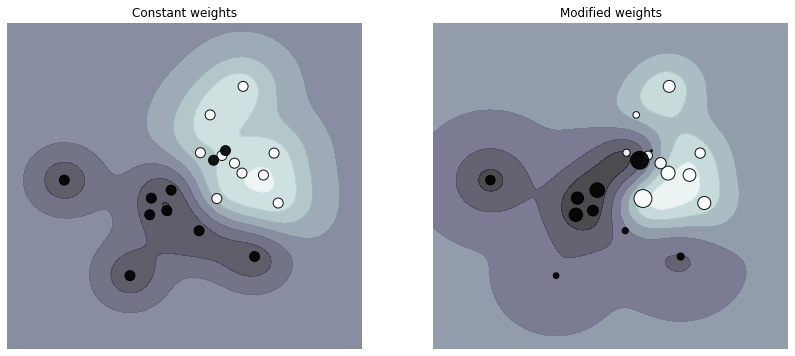

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10

sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()


## 1.2. Regression

The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

There are three different implementations of Support Vector Regression: [SVR](#svr_math), NuSVR and [LinearSVR](#linearsvr_math). LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR.

As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:


In [ ]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)

SVR()

In [ ]:
regr.predict([[1, 1]])

array([1.5])

### **Example:** Support Vector Regression (SVR) using linear and non-linear kernels

Toy example of 1D regression using linear, polynomial and RBF kernels.

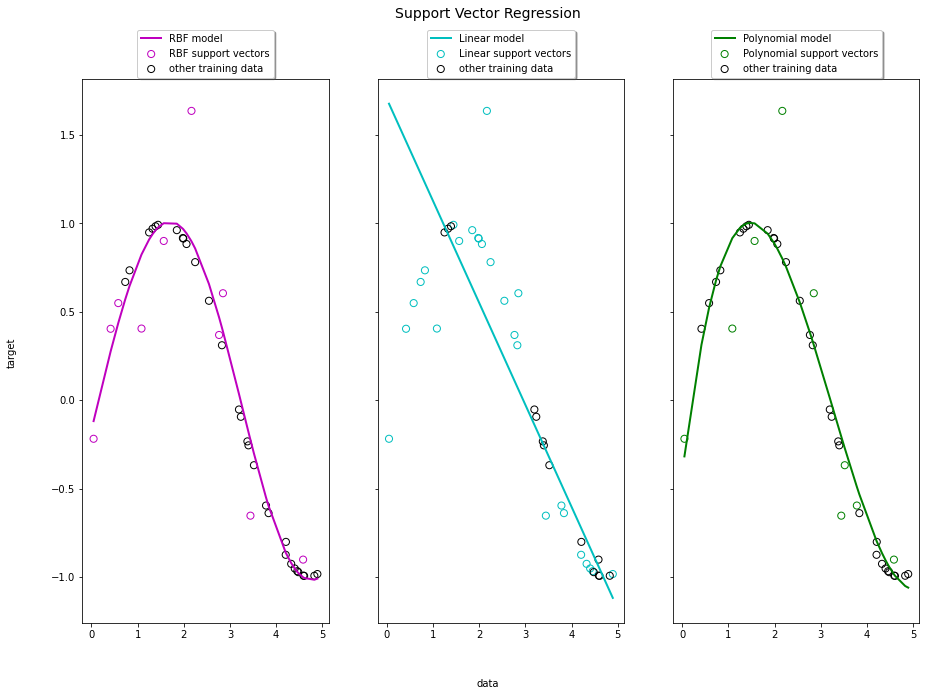

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## 1.4. Kernel Functions

The kernel function can be any of the following:
- linear: $\left\langle x, x^{\prime}\right\rangle$.
- polynomial: $\left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)^{d}$, where $d$ is specified by parameter degree, $r$ by coefo.
- rbf: $\exp \left(-\gamma\left\|x-x^{\prime}\right\|^{2}\right)$, where $\gamma$ is specified by parameter gamma, must be greater than 0 .
- sigmoid $\tanh \left(\gamma\left\langle x, x^{\prime}\right\rangle+r\right)$, where $r$ is specified by coef0.

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use GridSearchCV with C and gamma spaced exponentially far apart to choose good values.


####**Example:** RBF SVM parameters

This example illustrates the effect of the parameters gamma and C of the Radial Basis Function (RBF) kernel SVM.

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM.

The first plot is a visualization of the decision function for a variety of parameter values on a simplified classification problem involving only 2 input features and 2 possible target classes (binary classification). Note that this kind of plot is not possible to do for problems with more features or target classes.

The second plot is a heatmap of the classifier’s cross-validation accuracy as a function of C and gamma. For this example we explore a relatively large grid for illustration purposes. In practice, a logarithmic grid from 
$10^{-3}$ to $10^3$ is usually sufficient. If the best parameters lie on the boundaries of the grid, it can be extended in that direction in a subsequent search.

Note that the heat map plot has a special colorbar with a midpoint value close to the score values of the best performing models so as to make it easy to tell them apart in the blink of an eye.

The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

For intermediate values, we can see on the second plot that good models can be found on a diagonal of C and gamma. Smooth models (lower gamma values) can be made more complex by increasing the importance of classifying each point correctly (larger C values) hence the diagonal of good performing models.

Finally, one can also observe that for some intermediate values of gamma we get equally performing models when C becomes very large. This suggests that the set of support vectors does not change anymore. The radius of the RBF kernel alone acts as a good structural regularizer. Increasing C further doesn’t help, likely because there are no more training points in violation (inside the margin or wrongly classified), or at least no better solution can be found. Scores being equal, it may make sense to use the smaller C values, since very high C values typically increase fitting time.

On the other hand, lower C values generally lead to more support vectors, which may increase prediction time. Therefore, lowering the value of C involves a trade-off between fitting time and prediction time.

We should also note that small differences in scores results from the random splits of the cross-validation procedure. Those spurious variations can be smoothed out by increasing the number of CV iterations n_splits at the expense of compute time. Increasing the value number of C_range and gamma_range steps will increase the resolution of the hyper-parameter heat map.

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


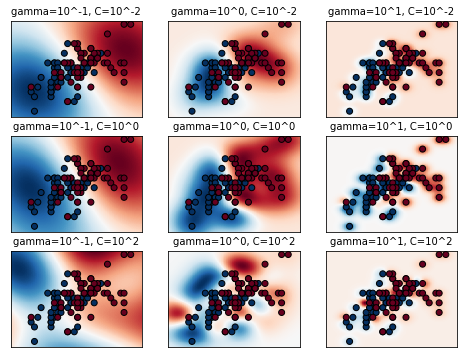

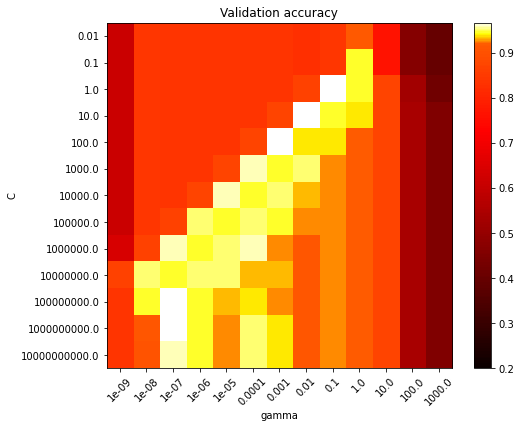

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


# #############################################################################
# Load and prepare data set
#
# dataset for grid search


iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()


#### **Example:** [Non-linear SVM](#NonLinearSVM_ex)

# 2. One-class SVM with non-linear kernel (RBF)

One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [ ]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

In [ ]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

In [ ]:
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

In [ ]:
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [ ]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

<function matplotlib.pyplot.show>

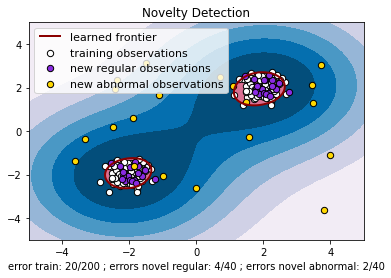

In [ ]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)

plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show

# 3. SVM Margins Example

The plots below illustrate the effect the parameter C has on the separation line. A large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation.

A small value of C includes more/all the observations, allowing the margins to be calculated using all the data in the area.

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm

In [ ]:
# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

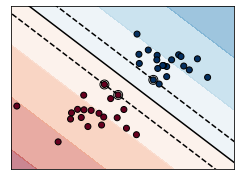

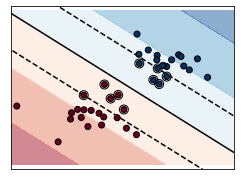

In [ ]:
# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

# 4. [Non-linear SVM](#NonLinearSVM_ex)

# 5. [SVM Tie Breaking Example](#SVMTieBreaking_ex)

# 6. [SVM: Separating hyperplane for unbalanced classes](#SVMUnbalanced_ex)

# 7. [SVM: Weighted samples](#SVMWeighted_ex)

# 8. Outlier detection on a real data set

This example illustrates the need for robust covariance estimation on a real data set. It is useful both for outlier detection and for a better understanding of the data structure.

We selected two sets of two variables from the Wine data set as an illustration of what kind of analysis can be done with several outlier detection tools. For the purpose of visualization, we are working with two-dimensional examples, but one should be aware that things are not so trivial in high-dimension, as it will be pointed out.

In both examples below, the main result is that the empirical covariance estimate, as a non-robust one, is highly influenced by the heterogeneous structure of the observations. Although the robust covariance estimate is able to focus on the main mode of the data distribution, it sticks to the assumption that the data should be Gaussian distributed, yielding some biased estimation of the data structure, but yet accurate to some extent. The One-Class SVM does not assume any parametric form of the data distribution and can therefore model the complex shape of the data much better.



### 8.1 First example

The first example illustrates how the Minimum Covariance Determinant robust estimator can help concentrate on a relevant cluster when outlying points exist. Here the empirical covariance estimation is skewed by points outside of the main cluster. Of course, some screening tools would have pointed out the presence of two clusters (Support Vector Machines, Gaussian Mixture Models, univariate outlier detection, …). But had it been a high-dimensional example, none of these could be applied that easily.

In [ ]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn.datasets import load_wine

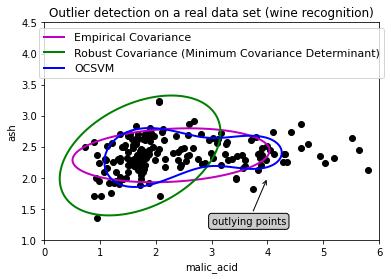

In [ ]:
# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]
legend1 = {}
legend2 = {}

# Get data
X1 = load_wine()["data"][:, [1, 2]]  # two clusters

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()

### 8.2 Second example

The second example shows the ability of the Minimum Covariance Determinant robust estimator of covariance to concentrate on the main mode of the data distribution: the location seems to be well estimated, although the covariance is hard to estimate due to the banana-shaped distribution. Anyway, we can get rid of some outlying observations. The One-Class SVM is able to capture the real data structure, but the difficulty is to adjust its kernel bandwidth parameter so as to obtain a good compromise between the shape of the data scatter matrix and the risk of over-fitting the data.

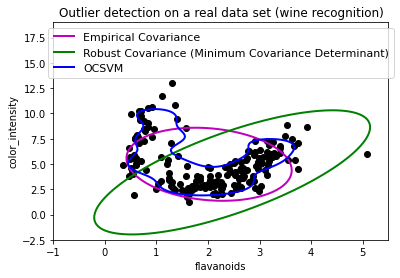

In [ ]:
# Get data
X2 = load_wine()["data"][:, [6, 9]]  # "banana"-shaped

# Learn a frontier for outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i]
    )

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X2[:, 0], X2[:, 1], color="black")
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend(
    (
        legend2_values_list[0].collections[0],
        legend2_values_list[1].collections[0],
        legend2_values_list[2].collections[0],
    ),
    (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")

plt.show()

# 9. [Plot different SVM classifiers in the iris dataset](#SVMClassIris_ex)

<a name="Math_ded">

# 10. Mathematical Deduction

</a>

<a name="svc_math">

### 1. SVC

</a>

Given training vectors $x_{i} \in \mathbb{R}^{p}, \mathrm{i}=1, \ldots, \mathrm{n}$, in two classes, and a vector $y \in\{1,-1\}^{n}$, our goal is to find $w \in \mathbb{R}^{p}$ and $b \in \mathbb{R}$ such that the prediction given by $\operatorname{sign}\left(w^{T} \phi(x)+b\right)$ is correct for most samples.
SVC solves the following primal problem:

$$
\begin{array}{r}
\min _{w, b, \zeta} \frac{1}{2} w^{T} w+C \sum_{i=1}^{n} \zeta_{i} \\
\text { subject to } y_{i}\left(w^{T} \phi\left(x_{i}\right)+b\right) \geq 1-\zeta_{i}, \\
\zeta_{i} \geq 0, i=1, \ldots, n
\end{array}
$$
Intuitively, we're trying to maximize the margin (by minimizing $\|w\|^{2}=w^{T} w$ ), while incurring a penalty when a sample is misclassified or within the margin boundary. Ideally, the value $y_{i}\left(w^{T} \phi\left(x_{i}\right)+b\right)$ would be $\geq 1$ for all samples, which indicates a perfect prediction. But problems are usually not always perfectly separable with a hyperplane, so we allow some samples to be at a distance $\zeta_{i}$ from their correct margin boundary. The penalty term c controls the strength of this penalty, and as a result, acts as an inverse regularization parameter (see note below).
The dual problem to the primal is
$$
\begin{gathered}
\min _{\alpha} \frac{1}{2} \alpha^{T} Q \alpha-e^{T} \alpha \\
\text { subject to } y^{T} \alpha=0 \\
0 \leq \alpha_{i} \leq C, i=1, \ldots, n
\end{gathered}
$$

where $e$ is the vector of all ones, and $Q$ is an $n$ by $n$ positive semidefinite matrix, $Q_{i j} \equiv y_{i} y_{j} K\left(x_{i}, x_{j}\right)$, where $K\left(x_{i}, x_{j}\right)=\phi\left(x_{i}\right)^{T} \phi\left(x_{j}\right)$ is the kernel. The terms $\alpha_{i}$ are called the dual coefficients, and they are upper-bounded by $C$. This dual representation highlights the fact that training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$ : see kernel trick.

Once the optimization problem is solved, the output of decision_function for a given sample $x$ becomes:
$$
\sum_{i \in S V} y_{i} \alpha_{i} K\left(x_{i}, x\right)+b
$$
and the predicted class correspond to its sign. We only need to sum over the support vectors (i.e. the samples that lie within the margin) because the dual coefficients $\alpha_{i}$ are zero for the other samples.

These parameters can be accessed through the attributes dual_coef_which holds the product $y_{i} \alpha_{i}$, support_vectors_which holds the support vectors, and intercept_ which holds the independent term $b$

**Note**: While SVM models derived from libsvm and liblinear use $C$ as regularization parameter, most other estimators use alpha. The exact equivalence between the amount of regularization of two models depends on the exact objective function optimized by the model. For example, when the estimator used is Ridge regression, the relation between them is given as $C=\frac{1}{a l p h a}$.

<a name="linearsvc_math">

### 2. LinearSVC

</a>

The primal problem can be equivalently formulated as
$$
\min _{w, b} \frac{1}{2} w^{T} w+C \sum_{i=1} \max \left(0,1-y_{i}\left(w^{T} \phi\left(x_{i}\right)+b\right)\right),
$$
where we make use of the hinge loss. This is the form that is directly optimized by Linearsvc, but unlike the dual form, this one does not involve inner products between samples, so the famous kernel trick cannot be applied. This is why only the linear kernel is supported by Linearsvc ( $\phi$ is the identity function).



<a name="nusvc_math">

### 3. NuSVC

</a>

The $\nu$-SVC formulation [15] is a reparameterization of the $C$-SVC and therefore mathematically equivalent.
We introduce a new parameter $\nu$ (instead of $C$ ) which controls the number of support vectors and margin errors: $\nu \in(0,1]$ is an upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors. A margin error corresponds to a sample that lies on the wrong side of its margin boundary: it is either misclassified, or it is correctly classified but does not lie beyond the margin.

<a name="svr_math">

### 4. SVR

</a>

Given training vectors $x_{i} \in \mathbb{R}^{p}, \mathrm{i}=1, \ldots, \mathrm{n}$, and a vector $y \in \mathbb{R}^{n} \varepsilon$-SVR solves the following primal problem:
$$
\begin{array}{r}
\min _{w, b, \zeta, \zeta^{*}} \frac{1}{2} w^{T} w+C \sum_{i=1}^{n}\left(\zeta_{i}+\zeta_{i}^{*}\right) \\
\text { subject to } y_{i}-w^{T} \phi\left(x_{i}\right)-b \leq \varepsilon+\zeta_{i}, \\
w^{T} \phi\left(x_{i}\right)+b-y_{i} \leq \varepsilon+\zeta_{i}^{*}, \\
\zeta_{i}, \zeta_{i}^{*} \geq 0, i=1, \ldots, n
\end{array}
$$
Here, we are penalizing samples whose prediction is at least $\varepsilon$ away from their true target. These samples penalize the objective by $\zeta_{i}$ or $\zeta_{i}^{*}$, depending on whether their predictions lie above or below the $\varepsilon$ tube.
The dual problem is
$$
\begin{gathered}
\min _{\alpha, \alpha^{*}} \frac{1}{2}\left(\alpha-\alpha^{*}\right)^{T} Q\left(\alpha-\alpha^{*}\right)+\varepsilon e^{T}\left(\alpha+\alpha^{*}\right)-y^{T}\left(\alpha-\alpha^{*}\right) \\
\text { subject to } e^{T}\left(\alpha-\alpha^{*}\right)=0 \\
0 \leq \alpha_{i}, \alpha_{i}^{*} \leq C, i=1, \ldots, n
\end{gathered}
$$
where $e$ is the vector of all ones, $Q$ is an $n$ by $n$ positive semidefinite matrix, $Q_{i j} \equiv K\left(x_{i}, x_{j}\right)=\phi\left(x_{i}\right)^{T} \phi\left(x_{j}\right)$ is the kernel. Here training vectors are implicitly mapped into a higher (maybe infinite) dimensional space by the function $\phi$.
The prediction is:
$$
\sum_{i \in S V}\left(\alpha_{i}-\alpha_{i}^{*}\right) K\left(x_{i}, x\right)+b
$$
These parameters can be accessed through the attributes dual_coef_which holds the difference $\alpha_{i}-\alpha_{i}^{*}$, support_vectors_ which holds the support vectors, and intercept_ which holds the independent term $b$


<a name="linearsvr_math">

### 5. LinearSVR

</a>

The primal problem can be equivalently formulated as
$$
\min _{w, b} \frac{1}{2} w^{T} w+C \sum_{i=1} \max \left(0,\left|y_{i}-\left(w^{T} \phi\left(x_{i}\right)+b\right)\right|-\varepsilon\right),
$$
where we make use of the epsilon-insensitive loss, i.e. errors of less than $\varepsilon$ are ignored. This is the form that is directly optimized by LinearSVR.

# **Problem 2: Application Case**

## In-Depth: Support Vector Machines

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### Motivating Support Vector Machines

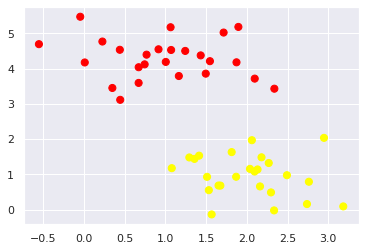

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!
We can draw them as follows:

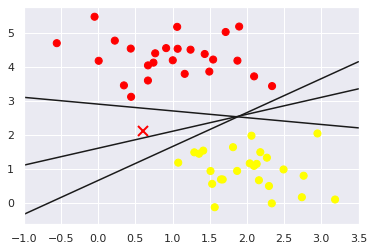

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

### Maximizing the margin

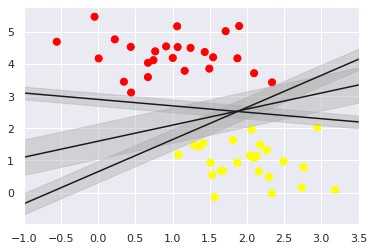

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

### Fitting a support vector machine

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

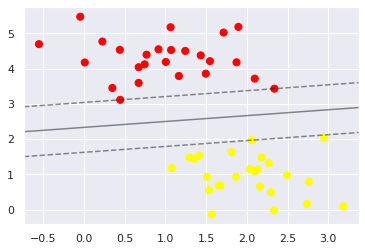

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

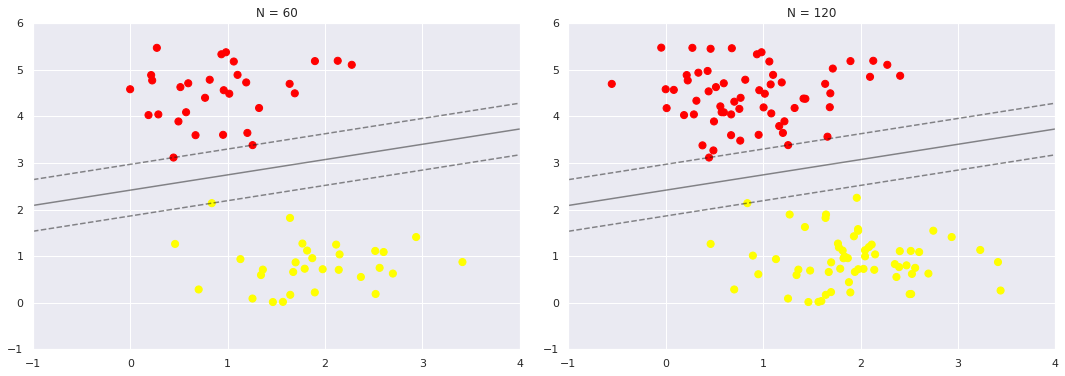

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 120, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 120, 200), value=10), Output()), _dom_classes=('w…

### Beyond Linear Boundaries Kernel SVM

Where SVM becomes extremely powerful is when it is combined with kernels. We have seen a version of kernels before, in the basis function regressions of In Depth: Linear Regression. There we projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.
In SVM models, we can use a version of the same idea. To motivate the need for kernels, let's look at some data that is not linearly separable:

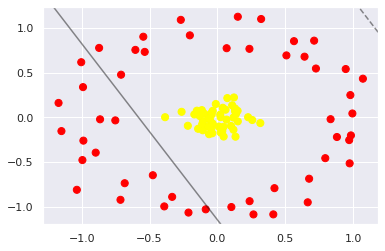

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Think about how we might project the data into a higher dimension such that a linear separator would be sufficient. For example, one simple projection we could use would be to compute a radial basis function centered on the middle clump:

In [ ]:
r = np.exp(-(X ** 2).sum(1))

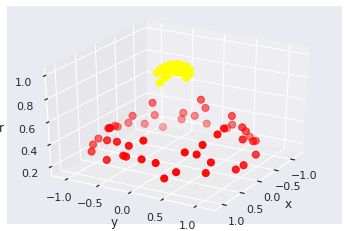

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()
#interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
#         X=fixed(X), y=fixed(y));

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, r=0.7.
Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results. In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.
One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a kernel transformation, as it is based on a similarity relationship (or kernel) between each pair of points.
A potential problem with this strategy—projecting  𝑁  points into  𝑁  dimensions—is that it might become very computationally intensive as  𝑁  grows large. However, because of a neat little procedure known as the kernel trick, a fit on kernel-transformed data can be done implicitly—that is, without ever building the full  𝑁 -dimensional representation of the kernel projection! This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.
In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

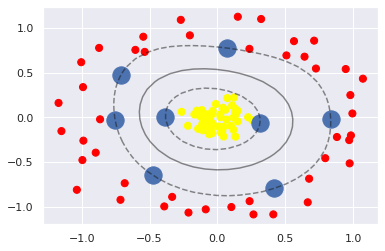

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1); #, facecolors='none'

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

### Tuning the SVM: Softening Margins

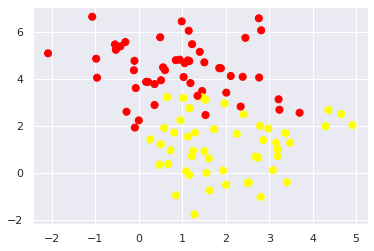

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit. The hardness of the margin is controlled by a tuning parameter, most often known as  𝐶 . For very large  𝐶 , the margin is hard, and points cannot lie in it. For smaller  𝐶 , the margin is softer, and can grow to encompass some points.
The plot shown below gives a visual picture of how a changing  𝐶  parameter affects the final fit, via the softening of the margin:

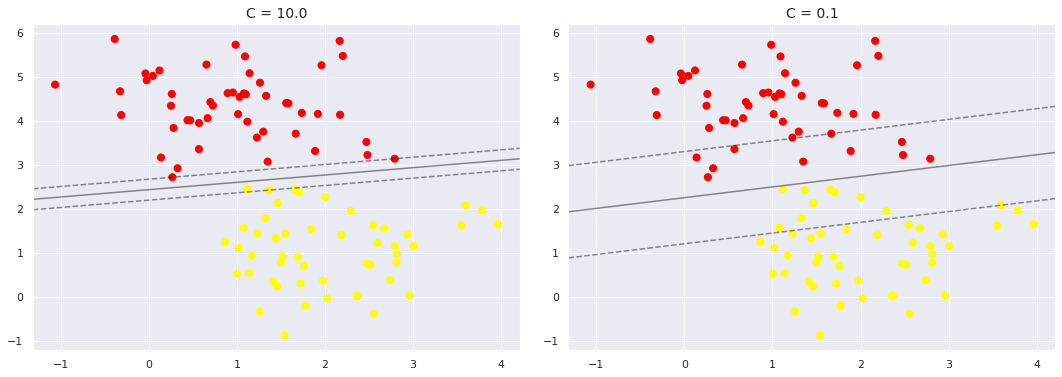

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

The optimal value of the  𝐶  parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure

## Example: Face Recognition

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


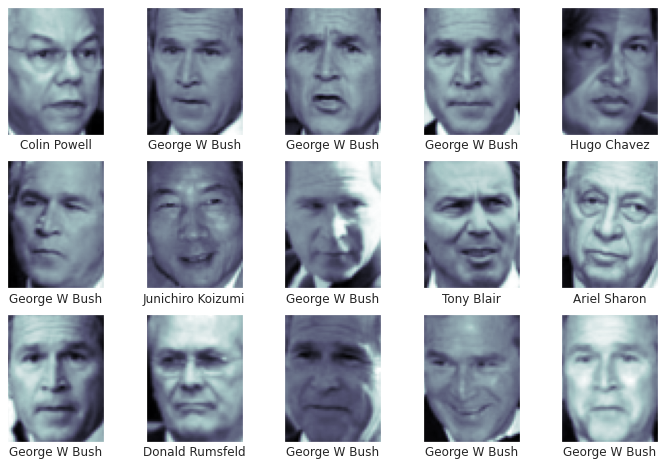

In [ ]:
fig, ax = plt.subplots(3, 5,figsize=(12,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis (see In Depth: Principal Component Analysis) to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

### Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 52.8 s, sys: 37.6 s, total: 1min 30s
Wall time: 50.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.
Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

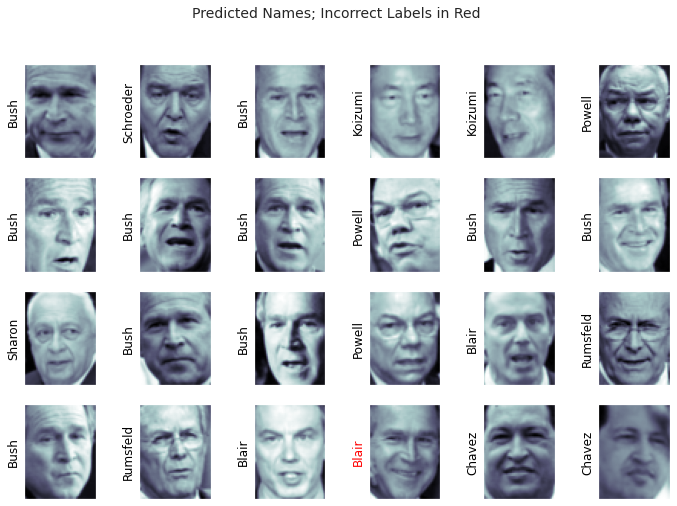

In [ ]:
fig, ax = plt.subplots(4, 6, figsize=(12,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row was mislabeled as Blair). We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Confusion Matrix

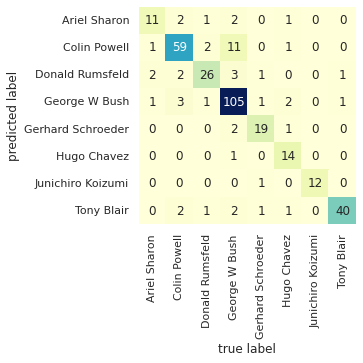

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');

This helps us get a sense of which labels are likely to be confused by the estimator.
For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation.

## [Mathematical Deductions](#Math_ded)

# References

- Vanderplas, J., & VanderPlas, J. (2016). Python Data Science Handbook. Van Duuren Media.
- Pedregosa, F. (2011). Scikit-learn: Machine Learning in Python. Scikit-Learn: Machine Learning in Python. Retrieved 2022, from https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lagrom/OptimizacionConvexa/HEAD?labpath=HW07_SVM_Scikit_Learn_Convex_Optimization_Angel_Alex_Luis_JuanP.ipynb)
